CANADA ANALYSIS

--- 1. Canada weights (2024 basket, major components) ---
                                           component  weight_2024  weight_frac
1                                               Food        16.91       0.1691
2                                            Shelter        29.41       0.2941
3    Household operations, furnishings and equipment        13.25       0.1325
4                              Clothing and footwear         4.38       0.0438
5                                     Transportation        16.90       0.1690
6                           Health and personal care         5.05       0.0505
7                  Recreation, education and reading        10.12       0.1012
8  Alcoholic beverages, tobacco products and recr...         3.99       0.0399

--- 2. Canada CPI index by component (Cleaned) ---
0                                           component  September 2024  \
2                                           All-items           161.1   
3               

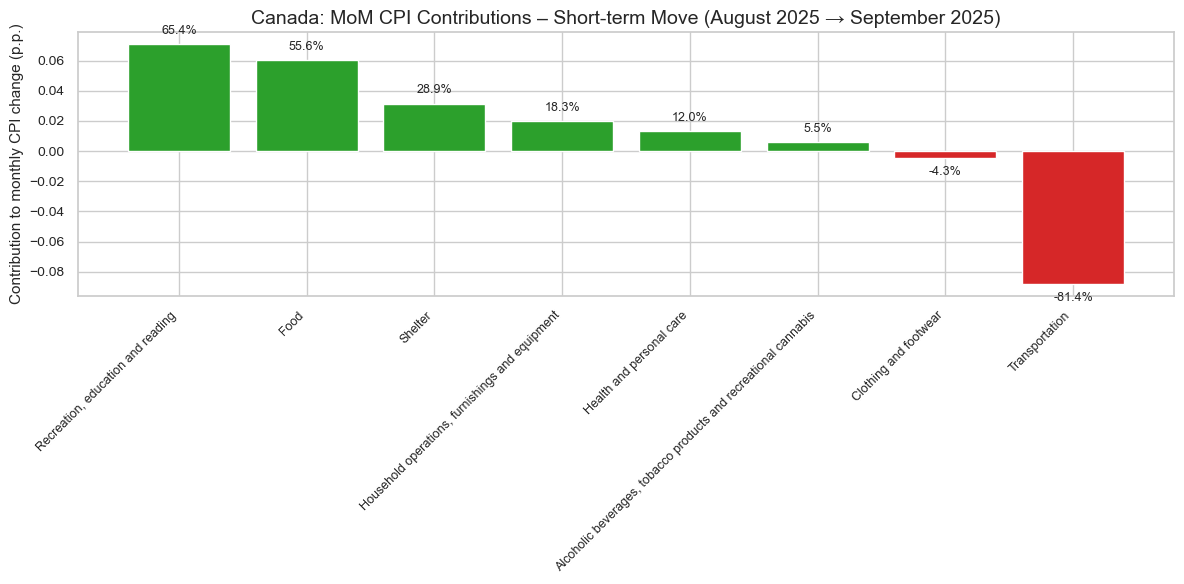

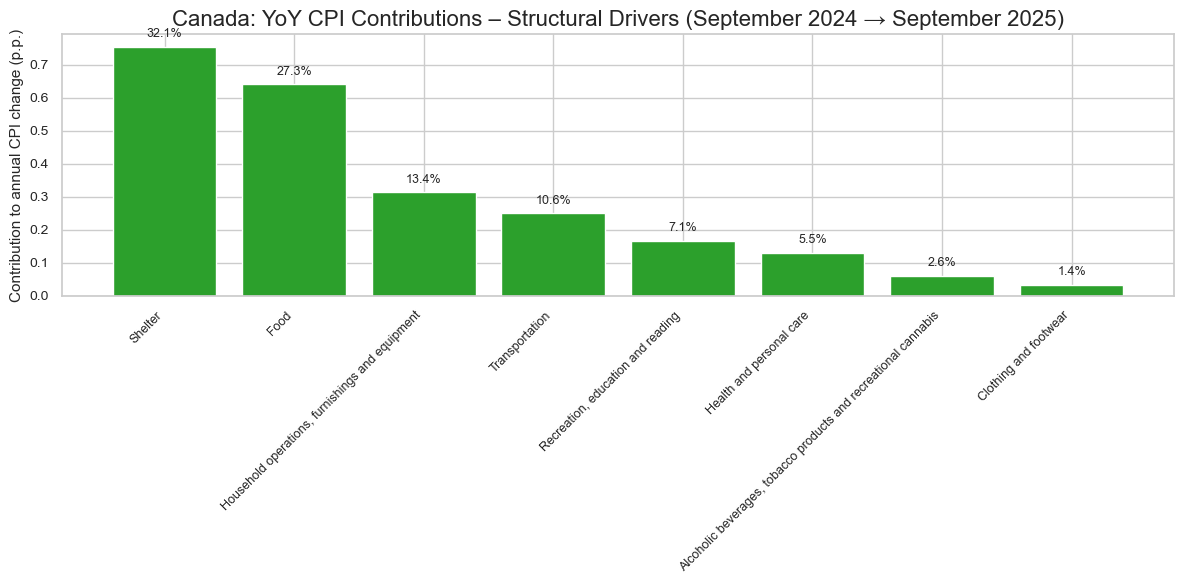

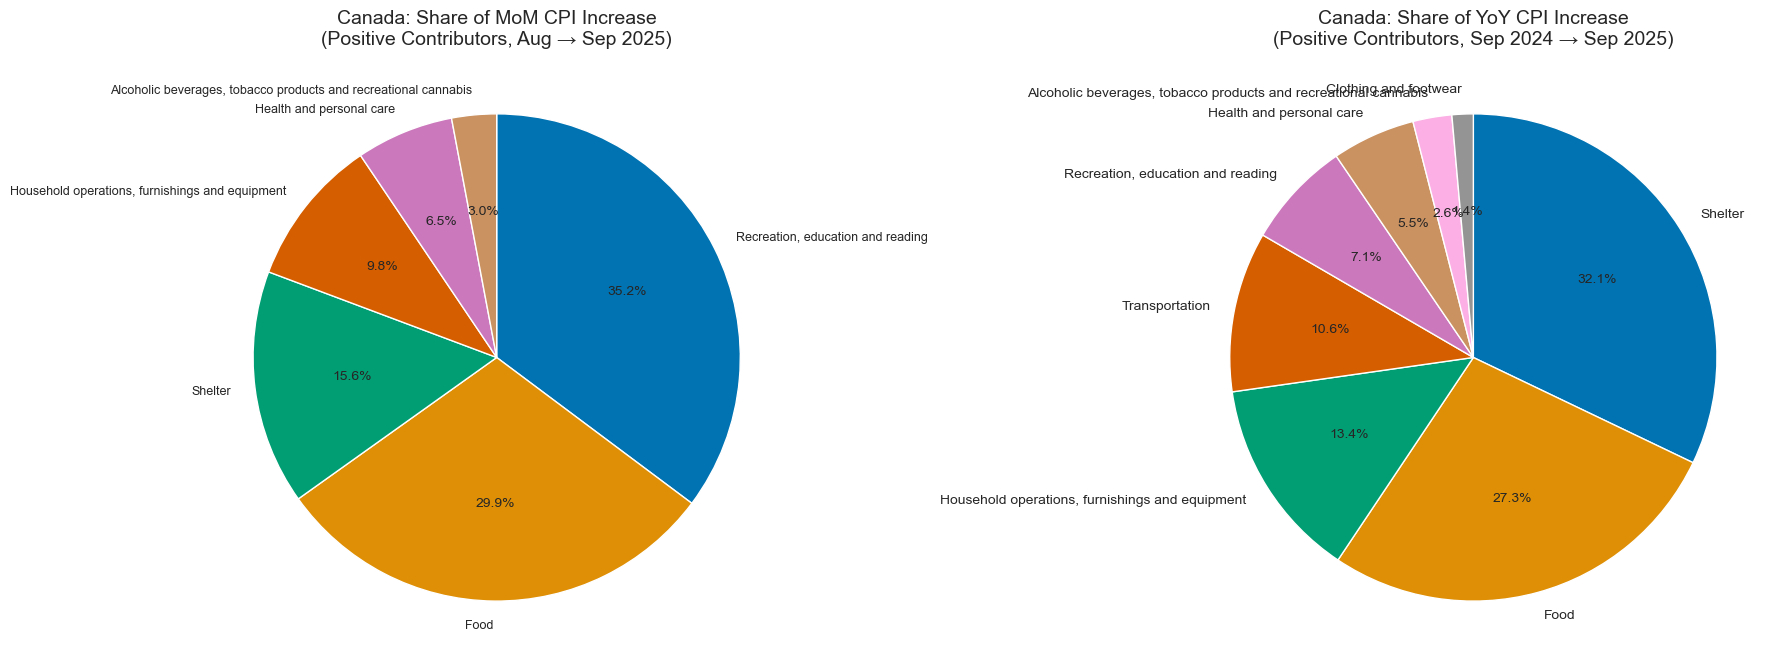


--- 6. Canada – contributions over time (pivot table) ---
component  Alcoholic beverages, tobacco products and recreational cannabis  \
period                                                                       
May → Jun                                          -0.003982                 
Jun → Jul                                          -0.001993                 
Jul → Aug                                           0.007976                 
Aug → Sep                                           0.005970                 

component  Clothing and footwear      Food  Health and personal care  \
period                                                                 
May → Jun              -0.018346  0.017308                  0.013083   
Jun → Jul              -0.082902  0.103742                  0.006525   
Jul → Aug               0.014084  0.000000                  0.013032   
Aug → Sep              -0.004679  0.060147                  0.012999   

component  Household operations, furnis

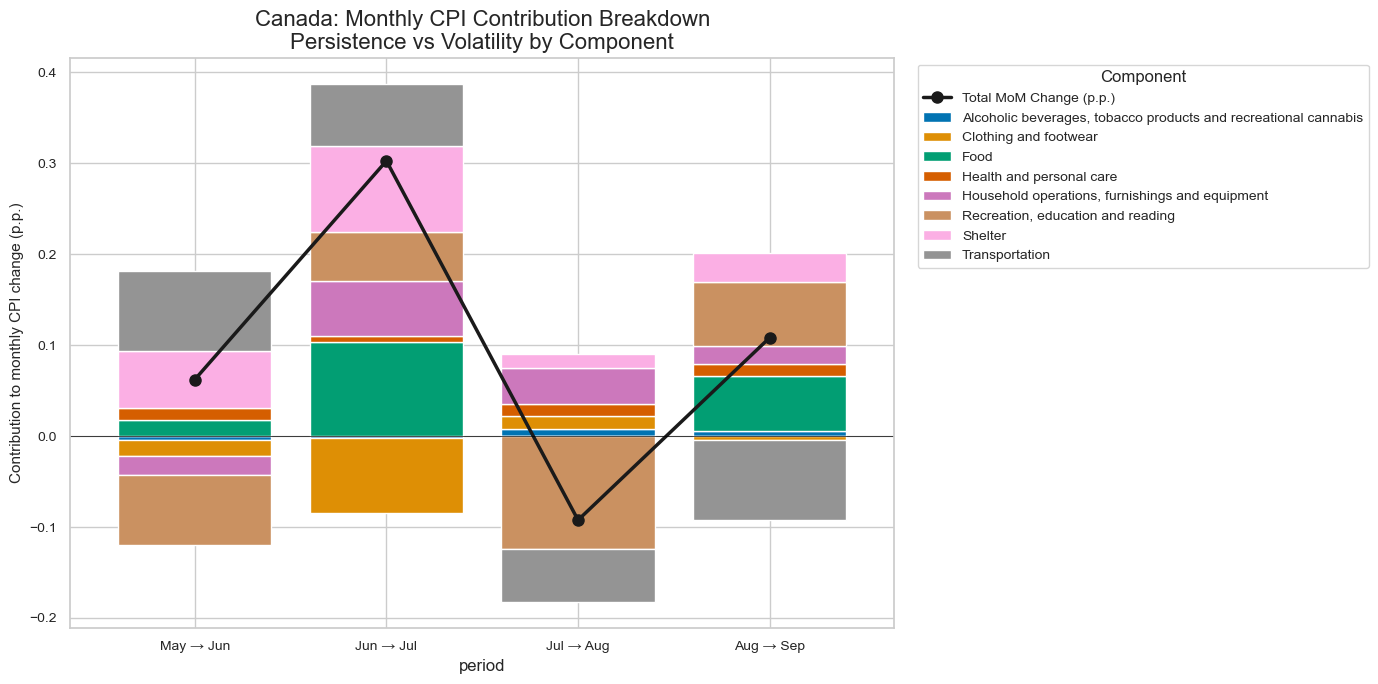


US ANALYSIS

--- 7. US – cleaned CPI table (first 15 rows) ---
   indent                                       category  rel_importance  \
5       0                                      All items         100.000   
6       1                                           Food          13.646   
7       2                                   Food at home           7.993   
8       3                    Cereals and bakery products           1.091   
9       3                 Meats, poultry, fish, and eggs           1.644   
10      3                  Dairy and related products(1)           0.726   
11      3                          Fruits and vegetables           1.311   
12      3  Nonalcoholic beverages and beverage materials           0.908   
13      3                             Other food at home           2.313   
14      2                         Food away from home(1)           5.653   
16      1                                         Energy           6.400   
17      2               

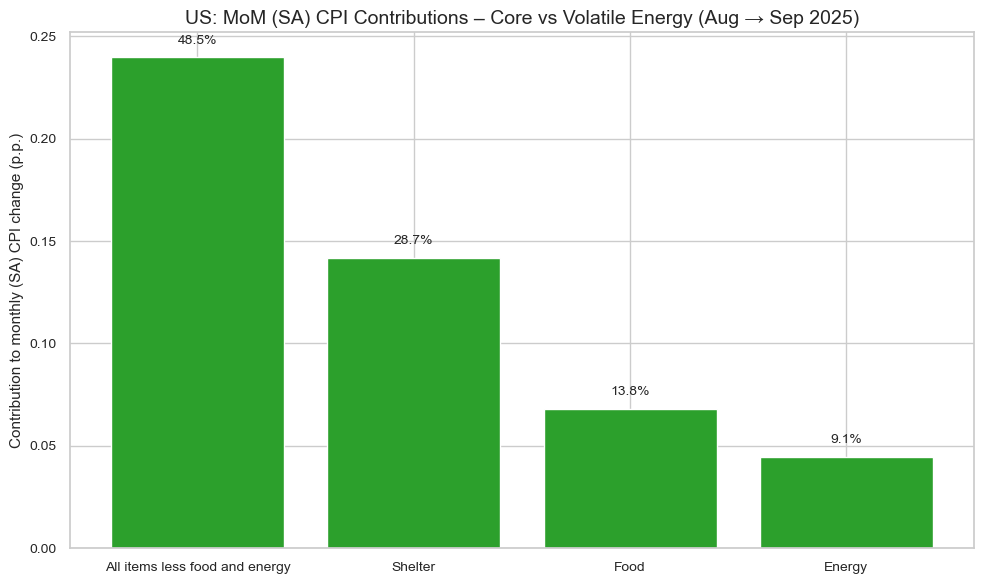

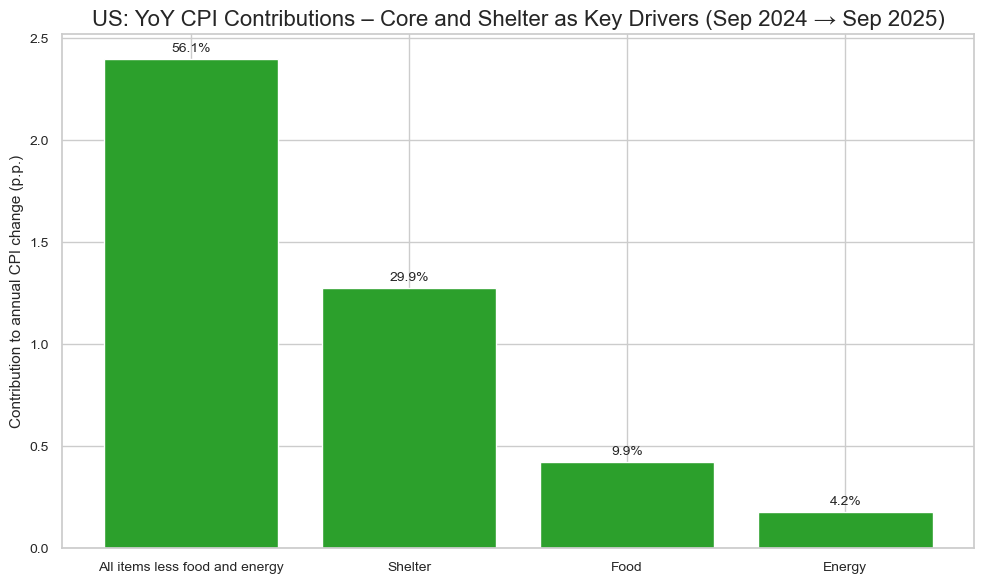

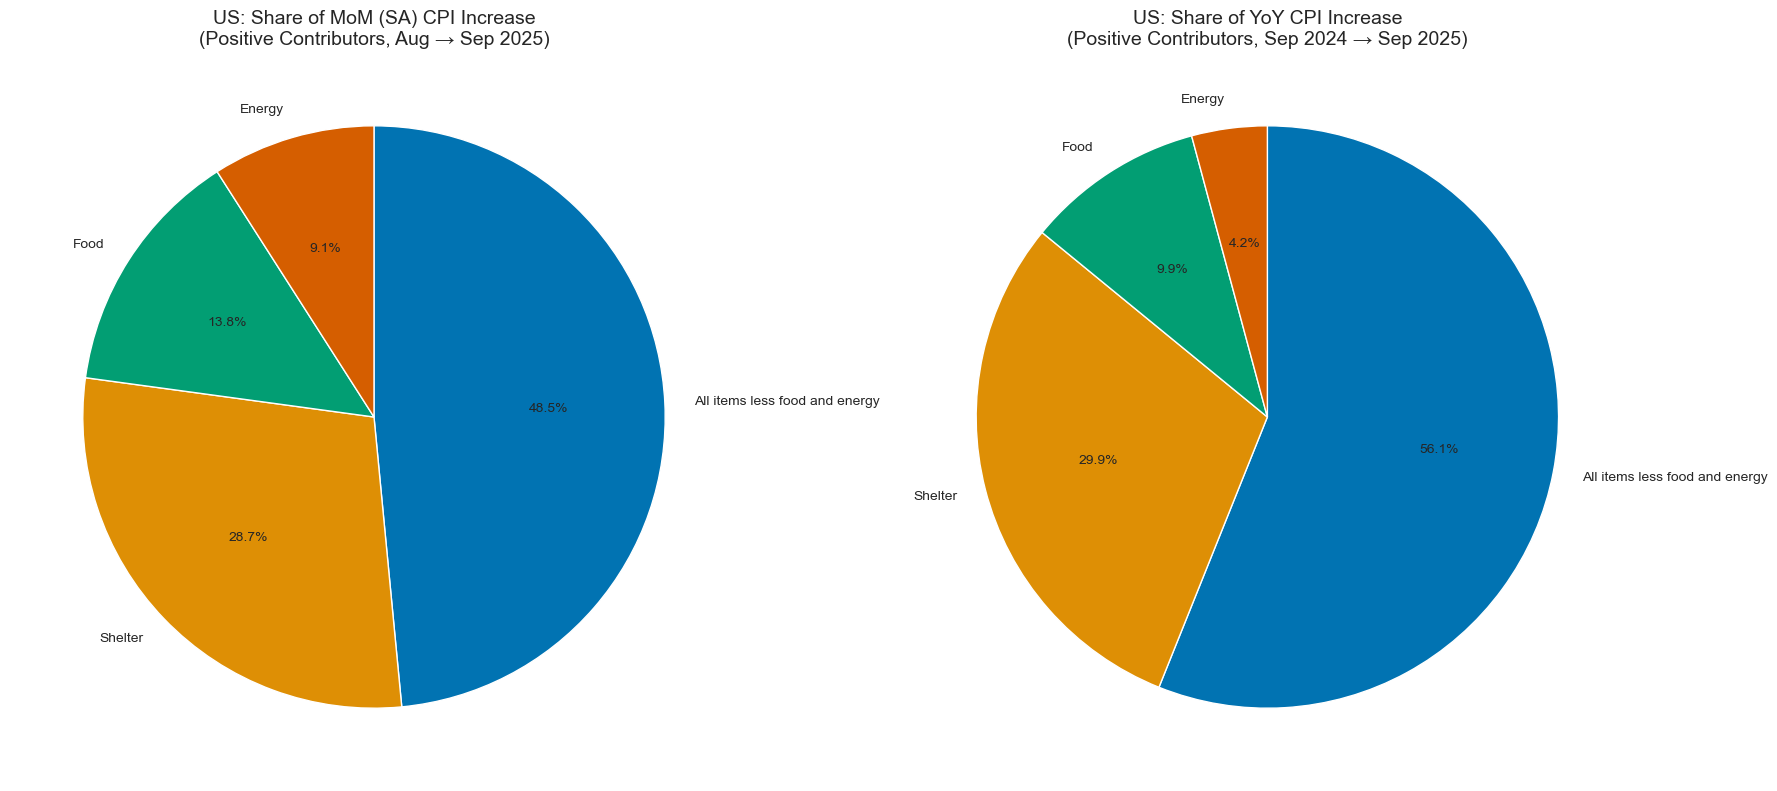


CANADA vs US COMPARISON

--- 11a. Canada vs US – Food & Shelter MONTH-OVER-MONTH (SA) Contributions ---
         Canada (p.p.)  US (p.p.)  Canada (% of move)  US (% of move)
Food          0.060147   0.068230           55.582782       13.790079
Shelter       0.031287   0.141884           28.912850       28.676411

--- 11b. Canada vs US – Food & Shelter YEAR-OVER-YEAR Contributions ---
         Canada (p.p.)  US (p.p.)  Canada (% of move)  US (% of move)
Food          0.639790   0.423026           27.270686        9.888863
Shelter       0.753281   1.276956           32.108170       29.850750


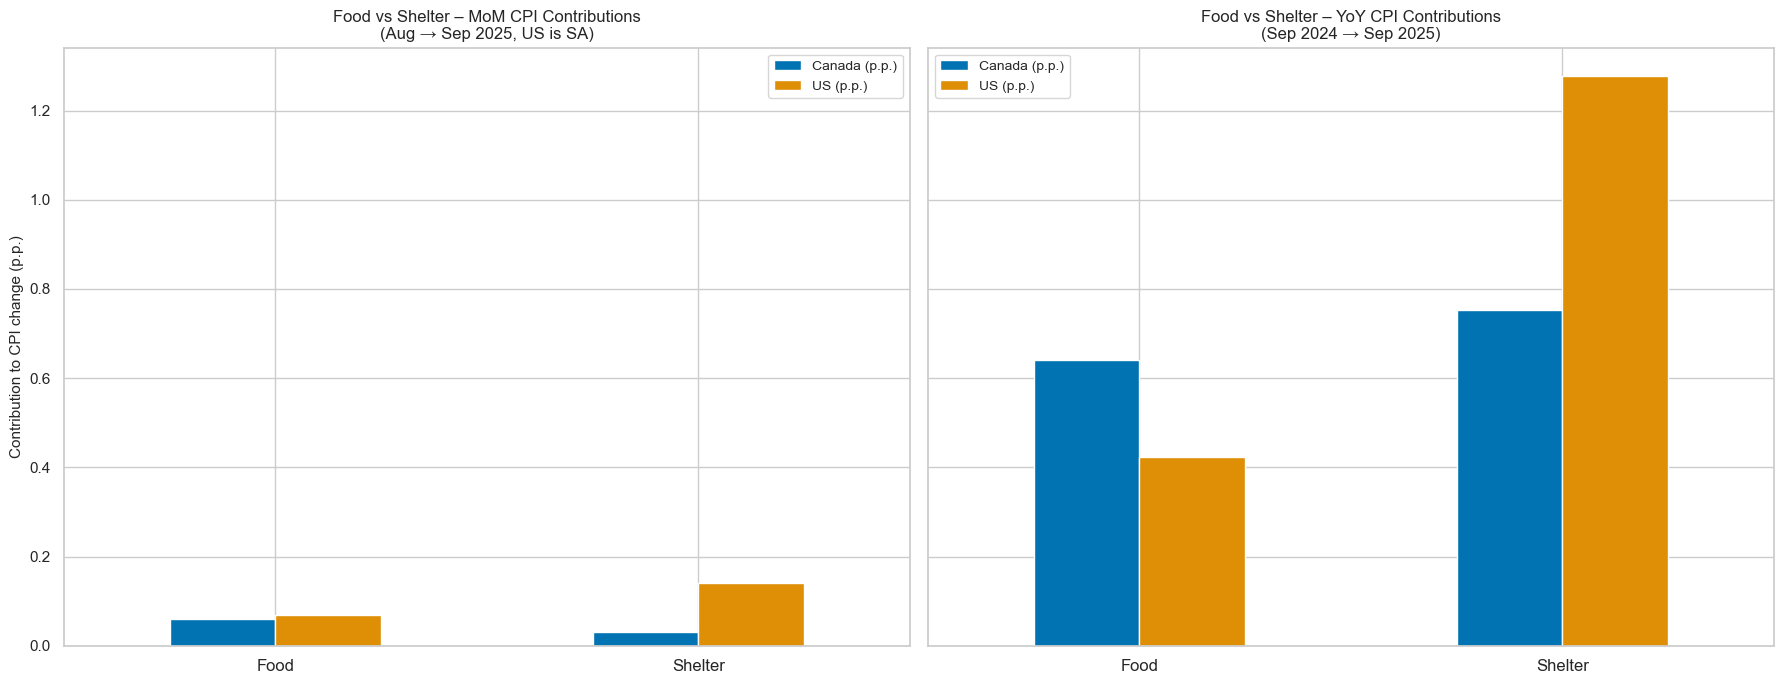


EXECUTIVE SUMMARY

Slide-Ready Summary (Condensed)
--------------------------------
• Canada – Shelter is the main structural driver of inflation:
  - Shelter contributes +0.75 p.p. to YoY CPI.
  - The latest monthly move is small in net terms: Shelter is a modest
    positive contributor, while Transportation is a noticeable drag.

• US – Core and Shelter dominate the trend, Energy provides the noise:
  - Core ("All items less food and energy") adds +2.40 p.p. YoY.
  - Shelter alone contributes +1.28 p.p. YoY.
  - Energy adds a smaller but still volatile share to the latest MoM move
    (+0.04 p.p.), reinforcing its role as the main source
    of month-to-month noise.

• Big picture:
  - In both Canada and the US, Shelter is the persistent inflation problem.
  - Energy and transportation swing around more and mainly affect
    month-to-month headline moves rather than the core trend.


Executive Summary: Key Inflation Drivers (Sep 2025)
-----------------------------------------------

In [3]:
"""
CPI DRIVERS – CANADA VS US
--------------------------

High-level objective:
    Decompose headline CPI for Canada and the US into major components
    (Food, Shelter, Energy, etc.) and quantify which components are
    driving inflation in the latest month and over the past year.

Methodology:
    For each country:
      1. Use CPI basket weights to represent the relative importance
         of each major CPI component.
      2. Combine these weights with component price changes to compute:
             contribution_pp = weight * % change
         which gives the contribution in percentage points to headline CPI.
      3. Separate:
           - month-over-month (MoM) changes → short-term, higher-frequency “noise”;
           - year-over-year (YoY) changes  → slower-moving, structural trends.
      4. Compare Canada and the US with an emphasis on Food and Shelter
         to distinguish temporary shocks from more persistent inflation pressure.

Data inputs (local CSV files):
    - 2024 CPI.csv
        Canada CPI basket weights by major component (Statistics Canada).

    - 1810000401-noSymbol (2).csv
        Canada CPI by product group with September 2024 and 2025 monthly
        data (Statistics Canada table).

    - news-release-table1-202509.csv
        US CPI-U Table 1 (BLS) with weights, MoM % changes and YoY % changes.
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================
# 0. Plotting style and file paths
# ==============================================================

# Configure a clean, research-style plotting theme for all charts.
sns.set_theme(style="whitegrid", palette="colorblind")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.grid"] = True

# Directory containing the CPI CSV files (update if needed).
BASE_DIR = "/Users/rjoshi_24/Desktop/CPI Data/Data"

# Exact filenames in that directory.
CAN_WEIGHTS_PATH = f"{BASE_DIR}/2024 CPI.csv"
CAN_INDEX_PATH   = f"{BASE_DIR}/1810000401-noSymbol (2).csv"
US_TABLE1_PATH   = f"{BASE_DIR}/news-release-table1-202509.csv"

# ==============================================================
# CANADA SECTION
# ==============================================================

print("="*30)
print("CANADA ANALYSIS")
print("="*30)

# --------------------------------------------------------------
# 1. Canada – load 2024 CPI basket weights (major components)
# --------------------------------------------------------------
# Load long-run CPI basket weights to capture the relative importance
# of each major component in the Canadian CPI.
can_w = pd.read_csv(CAN_WEIGHTS_PATH)
can_w.columns = ["component", "weight_2024"]

# Clean component names so they align with labels in the CPI index file.
can_w["component"] = (
    can_w["component"]
    .astype(str)
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# Keep only the 8 high-level CPI components (no detailed sub-categories).
major_components = [
    "Food",
    "Shelter",
    "Household operations, furnishings and equipment",
    "Clothing and footwear",
    "Transportation",
    "Health and personal care",
    "Recreation, education and reading",
    "Alcoholic beverages, tobacco products and recreational cannabis",
]
can_w = can_w[can_w["component"].isin(major_components)].copy()

# Convert weights from percent of basket to fraction.
can_w["weight_frac"] = can_w["weight_2024"] / 100.0

print("\n--- 1. Canada weights (2024 basket, major components) ---")
print(can_w)

# --------------------------------------------------------------
# 2. Canada – load CPI index by component (Sep 2024 – Sep 2025)
# --------------------------------------------------------------
# Load CPI index levels by component and month to compute MoM and YoY
# price changes at the component level.
try:
    raw_can_idx = pd.read_csv(CAN_INDEX_PATH, skiprows=7)
except FileNotFoundError:
    print(f"ERROR: File not found: {CAN_INDEX_PATH}")
    raise

# In this StatsCan format, the first row after the skipped metadata
# contains the true column headers.
new_header = raw_can_idx.iloc[0]
can_idx = raw_can_idx.iloc[1:].copy()
can_idx.columns = new_header

# Keep only rows that contain a valid product group name.
can_idx = can_idx[can_idx["Products and product groups 3 4"].notna()].copy()

# Rename the product-group column and remove any trailing footnote digits.
can_idx = can_idx.rename(columns={"Products and product groups 3 4": "component"})
can_idx["component"] = (
    can_idx["component"]
    .astype(str)
    .str.replace(r"\s+\d+$", "", regex=True)   # remove trailing digits like " 5"
    .str.replace(r"\s+", " ", regex=True)
    .str.strip()
)

# Required date columns:
#   - September 2024 for the YoY base;
#   - May–September 2025 for MoM dynamics.
month_cols = ["May 2025", "June 2025", "July 2025", "August 2025", "September 2025"]
yoy_col_can = "September 2024"
cols_to_keep = ["component", yoy_col_can] + month_cols

# Verify that all required columns are present in the file.
missing_cols = [col for col in cols_to_keep if col not in can_idx.columns]
if missing_cols:
    print(f"ERROR: The Canadian index file '{CAN_INDEX_PATH}' is missing required date columns:")
    print(missing_cols)
    raise KeyError(f"Missing columns: {missing_cols}")

can_idx = can_idx[cols_to_keep].copy()

# Convert index columns to numeric to ensure clean arithmetic later.
for col in [yoy_col_can] + month_cols:
    can_idx[col] = pd.to_numeric(can_idx[col], errors="coerce")

print("\n--- 2. Canada CPI index by component (Cleaned) ---")
print(can_idx.head(10))

# --------------------------------------------------------------
# 3. Canada – combine weights and indices → MoM & YoY contributions
# --------------------------------------------------------------
# Merge CPI basket weights with index levels and compute:
#   - MoM % change and contribution (percentage points),
#   - YoY % change and contribution (percentage points).
can_combined = can_idx.merge(
    can_w[["component", "weight_frac"]],
    on="component",
    how="inner"
)

latest_col = "September 2025"
prev_col   = "August 2025"

# 3A. MoM: August → September 2025 (short-term move).
can_combined["monthly_pct_change"] = (
    (can_combined[latest_col] / can_combined[prev_col] - 1.0) * 100.0
)
can_combined["contribution_pp_mom"] = (
    can_combined["weight_frac"] * can_combined["monthly_pct_change"]
)

# Compute share of the total MoM CPI move explained by each component.
total_contrib_can_mom = can_combined["contribution_pp_mom"].sum()
if abs(total_contrib_can_mom) < 1e-9:
    can_combined["share_of_total_mom_%"] = np.nan
else:
    can_combined["share_of_total_mom_%"] = (
        can_combined["contribution_pp_mom"] / total_contrib_can_mom * 100.0
    )

# 3B. YoY: September 2024 → September 2025 (structural move).
can_combined["yoy_pct_change"] = (
    (can_combined[latest_col] / can_combined[yoy_col_can] - 1.0) * 100.0
)
can_combined["contribution_pp_yoy"] = (
    can_combined["weight_frac"] * can_combined["yoy_pct_change"]
)

# Compute share of the total YoY CPI move explained by each component.
total_contrib_can_yoy = can_combined["contribution_pp_yoy"].sum()
if abs(total_contrib_can_yoy) < 1e-9:
    can_combined["share_of_total_yoy_%"] = np.nan
else:
    can_combined["share_of_total_yoy_%"] = (
        can_combined["contribution_pp_yoy"] / total_contrib_can_yoy * 100.0
    )

can_combined_sorted = can_combined.sort_values("contribution_pp_mom", ascending=False)
print("\n--- 3. Canada – MoM & YoY contributions to CPI change (Aug → Sep 2025) ---")
print(can_combined_sorted)

# --------------------------------------------------------------
# 4. Canada – MoM bar chart: component contributions for latest month
# --------------------------------------------------------------
# Visualizes which components drove the latest monthly headline CPI change
# and whether their contributions were inflationary (+) or disinflationary (–).
plot_df = can_combined_sorted.copy()
x = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#2ca02c' if y >= 0 else '#d62728' for y in plot_df["contribution_pp_mom"]]
ax.bar(x, plot_df["contribution_pp_mom"], color=colors)

ax.set_xticks(x)
ax.set_xticklabels(plot_df["component"], rotation=45, ha="right", fontsize=9)
ax.set_ylabel("Contribution to monthly CPI change (p.p.)", fontsize=11)
ax.set_title(
    f"Canada: MoM CPI Contributions – Short-term Move ({prev_col} → {latest_col})",
    fontsize=14,
)
ax.tick_params(axis="y", labelsize=10)

# Annotate bars with each component’s share of the total monthly move.
for i, (y, share) in enumerate(
    zip(plot_df["contribution_pp_mom"], plot_df["share_of_total_mom_%"])
):
    if pd.isna(share):
        continue
    ax.text(
        i,
        y + (0.005 if y >= 0 else -0.005),
        f"{share:.1f}%",
        ha="center",
        va="bottom" if y >= 0 else "top",
        fontsize=9,
    )

plt.tight_layout()
plt.savefig("canada_mom_contributions_bar.png")
plt.show()

# --------------------------------------------------------------
# 4b. Canada – YoY bar chart: component contributions over the year
# --------------------------------------------------------------
# Highlights which components explain the bulk of annual (structural)
# inflation rather than just monthly volatility.
plot_df_yoy = can_combined.sort_values("contribution_pp_yoy", ascending=False).copy()
x_yoy = np.arange(len(plot_df_yoy))

fig, ax = plt.subplots(figsize=(12, 6))
colors_yoy = ['#2ca02c' if y >= 0 else '#d62728' for y in plot_df_yoy["contribution_pp_yoy"]]
ax.bar(x_yoy, plot_df_yoy["contribution_pp_yoy"], color=colors_yoy)

ax.set_xticks(x_yoy)
ax.set_xticklabels(plot_df_yoy["component"], rotation=45, ha="right", fontsize=9)
ax.set_ylabel("Contribution to annual CPI change (p.p.)", fontsize=11)
ax.set_title(
    f"Canada: YoY CPI Contributions – Structural Drivers ({yoy_col_can} → {latest_col})",
    fontsize=16,
)
ax.tick_params(axis="y", labelsize=10)

# Annotate bars with each component’s share of the total annual move.
for i, (y, share) in enumerate(
    zip(plot_df_yoy["contribution_pp_yoy"], plot_df_yoy["share_of_total_yoy_%"])
):
    if pd.isna(share):
        continue
    ax.text(
        i,
        y + (0.02 if y >= 0 else -0.02),
        f"{share:.1f}%",
        ha="center",
        va="bottom" if y >= 0 else "top",
        fontsize=9,
    )

plt.tight_layout()
plt.savefig("canada_yoy_contributions_bar.png")
plt.show()

# --------------------------------------------------------------
# 5. Canada – MoM vs YoY pie charts (positive contributors only)
# --------------------------------------------------------------
# Compares the composition of positive contributions to CPI for:
#   - MoM: short-term increase,
#   - YoY: persistent annual increase.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# MoM positive contributors.
positive_can_mom = can_combined[can_combined["contribution_pp_mom"] > 0].copy()
positive_can_mom = positive_can_mom.sort_values("share_of_total_mom_%", ascending=False)
wedges, texts, autotexts = ax1.pie(
    positive_can_mom["share_of_total_mom_%"],
    labels=positive_can_mom["component"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    textprops={"fontsize": 10},
)
for txt in texts:
    txt.set_fontsize(9)
for at in autotexts:
    at.set_fontsize(10)
ax1.set_title(
    "Canada: Share of MoM CPI Increase\n(Positive Contributors, Aug → Sep 2025)",
    fontsize=14,
)

# YoY positive contributors.
positive_can_yoy = can_combined[can_combined["contribution_pp_yoy"] > 0].copy()
positive_can_yoy = positive_can_yoy.sort_values("share_of_total_yoy_%", ascending=False)
wedges, texts, autotexts = ax2.pie(
    positive_can_yoy["share_of_total_yoy_%"],
    labels=positive_can_yoy["component"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    textprops={"fontsize": 10},
)
for txt in texts:
    txt.set_fontsize(10)
for at in autotexts:
    at.set_fontsize(10)
ax2.set_title(
    "Canada: Share of YoY CPI Increase\n(Positive Contributors, Sep 2024 → Sep 2025)",
    fontsize=14,
)

plt.tight_layout()
plt.savefig("canada_mom_yoy_pie_charts.png")
plt.show()

# --------------------------------------------------------------
# 6. Canada – stacked bar: contributions over time by component
# --------------------------------------------------------------
# Builds a month-pair-by-component table for:
#   May→Jun, Jun→Jul, Jul→Aug, and Aug→Sep,
# then visualizes persistence vs volatility across components.
month_pairs = list(zip(month_cols[:-1], month_cols[1:]))
records = []
for prev_m, cur_m in month_pairs:
    tmp = can_idx.merge(
        can_w[["component", "weight_frac"]],
        on="component",
        how="inner"
    ).copy()
    tmp["monthly_pct_change"] = (tmp[cur_m] / tmp[prev_m] - 1.0) * 100.0
    tmp["contribution_pp"] = tmp["weight_frac"] * tmp["monthly_pct_change"]
    for _, row in tmp.iterrows():
        records.append({
            "period": f"{prev_m[:3]} → {cur_m[:3]}",  # e.g. "May → Jun"
            "component": row["component"],
            "contribution_pp": row["contribution_pp"],
        })

can_contrib_long = pd.DataFrame(records)
can_contrib_pivot = can_contrib_long.pivot(
    index="period",
    columns="component",
    values="contribution_pp"
)

# Ensure periods appear in chronological order on the x-axis.
period_order = [f"{p[:3]} → {c[:3]}" for p, c in month_pairs]
can_contrib_pivot = can_contrib_pivot.reindex(period_order)

print("\n--- 6. Canada – contributions over time (pivot table) ---")
print(can_contrib_pivot)

fig, ax = plt.subplots(figsize=(14, 7))
can_contrib_pivot.plot(kind="bar", stacked=True, ax=ax, width=0.8)

# Add a line series for the total MoM CPI change across all components.
total_mom = can_contrib_pivot.sum(axis=1)
ax.plot(
    np.arange(len(total_mom)),
    total_mom,
    "ko-",
    label="Total MoM Change (p.p.)",
    linewidth=2.5,
    markersize=8,
)
ax.axhline(0, color="black", linewidth=0.5)

plt.ylabel("Contribution to monthly CPI change (p.p.)", fontsize=11)
plt.title(
    "Canada: Monthly CPI Contribution Breakdown\nPersistence vs Volatility by Component",
    fontsize=16,
)
plt.xticks(rotation=0, ha="center", fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Component", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=10)
plt.tight_layout()
plt.savefig("canada_stacked_contributions_time_series.png")
plt.show()

# ==============================================================
# US SECTION
# ==============================================================

print("\n" + "="*30)
print("US ANALYSIS")
print("="*30)

# --------------------------------------------------------------
# 7. US – load CPI-U Table 1 (headline, core, etc.)
# --------------------------------------------------------------
# Load BLS Table 1, which contains:
#   - relative importance (weights),
#   - index levels,
#   - unadjusted and seasonally adjusted MoM % changes,
#   - YoY % changes.
try:
    us_raw = pd.read_csv(US_TABLE1_PATH)
except FileNotFoundError:
    print(f"ERROR: File not found: {US_TABLE1_PATH}")
    raise

# Skip metadata at the top; keep the key numeric columns.
us = us_raw.iloc[5:, :10].copy()
us.columns = [
    "indent",
    "category",
    "rel_importance",
    "index_sep_2024",
    "index_aug_2025",
    "index_sep_2025",
    "yoy_pct",
    "mom_aug_sep_unadj",
    "mom_sa_prev",
    "mom_sa_aug_sep",
]

us = us[us["category"].notna()].copy()

# Convert numeric columns from strings to numbers where necessary.
num_cols = [
    "rel_importance",
    "index_sep_2024",
    "index_aug_2025",
    "index_sep_2025",
    "yoy_pct",
    "mom_aug_sep_unadj",
    "mom_sa_prev",
    "mom_sa_aug_sep",
]
for col in num_cols:
    us[col] = pd.to_numeric(us[col], errors="coerce")

print("\n--- 7. US – cleaned CPI table (first 15 rows) ---")
print(us.head(15))

# --------------------------------------------------------------
# 8. US – select key categories and compute MoM (SA) & YoY contributions
# --------------------------------------------------------------
# Focus on standard policy-relevant aggregates:
#   Food, Energy, Shelter, and Core ("All items less food and energy").
us_major_components = [
    "Food",
    "Energy",
    "Shelter",
    "All items less food and energy",  # Core CPI
]
us_major = us[us["category"].isin(us_major_components)].copy()

# Convert relative importance from percent to fraction of the CPI basket.
us_major["weight_frac"] = us_major["rel_importance"] / 100.0

# MoM: use the seasonally adjusted MoM % change (mom_sa_aug_sep).
us_major["contribution_pp_mom"] = (
    us_major["weight_frac"] * us_major["mom_sa_aug_sep"]
)
total_contrib_us_mom = us_major["contribution_pp_mom"].sum()
if abs(total_contrib_us_mom) < 1e-9:
    us_major["share_of_total_mom_%"] = np.nan
else:
    us_major["share_of_total_mom_%"] = (
        us_major["contribution_pp_mom"] / total_contrib_us_mom * 100.0
    )

# YoY: use the YoY % change for each category.
us_major["contribution_pp_yoy"] = (
    us_major["weight_frac"] * us_major["yoy_pct"]
)
total_contrib_us_yoy = us_major["contribution_pp_yoy"].sum()
if abs(total_contrib_us_yoy) < 1e-9:
    us_major["share_of_total_yoy_%"] = np.nan
else:
    us_major["share_of_total_yoy_%"] = (
        us_major["contribution_pp_yoy"] / total_contrib_us_yoy * 100.0
    )

print("\n--- 8. US – MoM (SA) & YoY contributions to CPI change (Aug → Sep 2025) ---")
print(us_major)

# --------------------------------------------------------------
# 9. US – MoM bar chart: seasonally adjusted contributions
# --------------------------------------------------------------
# Shows how much each key US category contributed to the latest
# seasonally adjusted monthly CPI move.
us_plot_mom = us_major.sort_values("contribution_pp_mom", ascending=False).copy()
x_us_mom = np.arange(len(us_plot_mom))

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#2ca02c' if y >= 0 else '#d62728' for y in us_plot_mom["contribution_pp_mom"]]
ax.bar(x_us_mom, us_plot_mom["contribution_pp_mom"], color=colors)

ax.set_xticks(x_us_mom)
ax.set_xticklabels(us_plot_mom["category"], rotation=0, ha="center", fontsize=10)
ax.set_ylabel("Contribution to monthly (SA) CPI change (p.p.)", fontsize=11)
ax.set_title(
    "US: MoM (SA) CPI Contributions – Core vs Volatile Energy (Aug → Sep 2025)",
    fontsize=14,
)
ax.tick_params(axis="y", labelsize=10)

# Annotate with each category’s share of the total MoM move.
for i, (y, share) in enumerate(
    zip(us_plot_mom["contribution_pp_mom"], us_plot_mom["share_of_total_mom_%"])
):
    if pd.isna(share):
        continue
    ax.text(
        i,
        y + (0.005 if y >= 0 else -0.005),
        f"{share:.1f}%",
        ha="center",
        va="bottom" if y >= 0 else "top",
        fontsize=10,
    )

plt.tight_layout()
plt.savefig("us_mom_sa_contributions_bar.png")
plt.show()

# --------------------------------------------------------------
# 9b. US – YoY bar chart: annual contributions by category
# --------------------------------------------------------------
# Highlights which US aggregates (Core, Energy, Shelter) explain most
# of the annual inflation trend.
us_plot_yoy = us_major.sort_values("contribution_pp_yoy", ascending=False).copy()
x_us_yoy = np.arange(len(us_plot_yoy))

fig, ax = plt.subplots(figsize=(10, 6))
colors_yoy = ['#2ca02c' if y >= 0 else '#d62728' for y in us_plot_yoy["contribution_pp_yoy"]]
ax.bar(x_us_yoy, us_plot_yoy["contribution_pp_yoy"], color=colors_yoy)

ax.set_xticks(x_us_yoy)
ax.set_xticklabels(us_plot_yoy["category"], rotation=0, ha="center", fontsize=10)
ax.set_ylabel("Contribution to annual CPI change (p.p.)", fontsize=11)
ax.set_title(
    "US: YoY CPI Contributions – Core and Shelter as Key Drivers (Sep 2024 → Sep 2025)",
    fontsize=16,
)
ax.tick_params(axis="y", labelsize=10)

# Annotate with each category’s share of the total YoY move.
for i, (y, share) in enumerate(
    zip(us_plot_yoy["contribution_pp_yoy"], us_plot_yoy["share_of_total_yoy_%"])
):
    if pd.isna(share):
        continue
    ax.text(
        i,
        y + (0.02 if y >= 0 else -0.02),
        f"{share:.1f}%",
        ha="center",
        va="bottom" if y >= 0 else "top",
        fontsize=10,
    )

plt.tight_layout()
plt.savefig("us_yoy_contributions_bar.png")
plt.show()

# --------------------------------------------------------------
# 10. US – MoM-SA and YoY pie charts (positive contributors)
# --------------------------------------------------------------
# Summarizes the composition of CPI increases across key aggregates for
# both MoM and YoY horizons.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

positive_us_mom = us_major[us_major["contribution_pp_mom"] > 0].copy()
positive_us_mom = positive_us_mom.sort_values("share_of_total_mom_%", ascending=False)
wedges, texts, autotexts = ax1.pie(
    positive_us_mom["share_of_total_mom_%"],
    labels=positive_us_mom["category"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    textprops={"fontsize": 10},
)
for txt in texts:
    txt.set_fontsize(10)
for at in autotexts:
    at.set_fontsize(10)
ax1.set_title(
    "US: Share of MoM (SA) CPI Increase\n(Positive Contributors, Aug → Sep 2025)",
    fontsize=14,
)

positive_us_yoy = us_major[us_major["contribution_pp_yoy"] > 0].copy()
positive_us_yoy = positive_us_yoy.sort_values("share_of_total_yoy_%", ascending=False)
wedges, texts, autotexts = ax2.pie(
    positive_us_yoy["share_of_total_yoy_%"],
    labels=positive_us_yoy["category"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    textprops={"fontsize": 10},
)
for txt in texts:
    txt.set_fontsize(10)
for at in autotexts:
    at.set_fontsize(10)
ax2.set_title(
    "US: Share of YoY CPI Increase\n(Positive Contributors, Sep 2024 → Sep 2025)",
    fontsize=14,
)

plt.tight_layout()
plt.savefig("us_mom_yoy_pie_charts.png")
plt.show()

# ==============================================================
# CANADA vs US COMPARISON
# ==============================================================

print("\n" + "="*30)
print("CANADA vs US COMPARISON")
print("="*30)

# Align key components (Food and Shelter) across both countries for
# direct comparison of MoM and YoY contributions.
can_latest = can_combined.set_index("component")
us_latest  = us_major.set_index("category")
comp_list = ["Food", "Shelter"]

# MoM comparison for Food and Shelter.
comparison_mom = pd.DataFrame(
    {
        "Canada (p.p.)": [can_latest.loc[c, "contribution_pp_mom"] for c in comp_list],
        "US (p.p.)": [us_latest.loc[c, "contribution_pp_mom"] for c in comp_list],
        "Canada (% of move)": [can_latest.loc[c, "share_of_total_mom_%"] for c in comp_list],
        "US (% of move)": [us_latest.loc[c, "share_of_total_mom_%"] for c in comp_list],
    },
    index=comp_list,
)
print("\n--- 11a. Canada vs US – Food & Shelter MONTH-OVER-MONTH (SA) Contributions ---")
print(comparison_mom)

# YoY comparison for Food and Shelter.
comparison_yoy = pd.DataFrame(
    {
        "Canada (p.p.)": [can_latest.loc[c, "contribution_pp_yoy"] for c in comp_list],
        "US (p.p.)": [us_latest.loc[c, "contribution_pp_yoy"] for c in comp_list],
        "Canada (% of move)": [can_latest.loc[c, "share_of_total_yoy_%"] for c in comp_list],
        "US (% of move)": [us_latest.loc[c, "share_of_total_yoy_%"] for c in comp_list],
    },
    index=comp_list,
)
print("\n--- 11b. Canada vs US – Food & Shelter YEAR-OVER-YEAR Contributions ---")
print(comparison_yoy)

# Side-by-side bar charts for MoM and YoY p.p. contributions.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

comparison_mom[["Canada (p.p.)", "US (p.p.)"]].plot(
    kind="bar",
    ax=ax1,
    title="Food vs Shelter – MoM CPI Contributions\n(Aug → Sep 2025, US is SA)",
    xlabel="",
    rot=0,
)
ax1.set_ylabel("Contribution to CPI change (p.p.)", fontsize=11)
ax1.legend(fontsize=10)
ax1.tick_params(axis="x", labelsize=12)

comparison_yoy[["Canada (p.p.)", "US (p.p.)"]].plot(
    kind="bar",
    ax=ax2,
    title="Food vs Shelter – YoY CPI Contributions\n(Sep 2024 → Sep 2025)",
    xlabel="",
    rot=0,
)
ax2.set_ylabel("Contribution to CPI change (p.p.)", fontsize=11)
ax2.legend(fontsize=10)
ax2.tick_params(axis="x", labelsize=12)

plt.tight_layout()
plt.savefig("canada_us_comparison_bars.png")
plt.show()

# ==============================================================
# EXECUTIVE SUMMARY (text output for “so what?” slide)
# ==============================================================

print("\n" + "="*30)
print("EXECUTIVE SUMMARY")
print("="*30)

# Key Canadian metrics.
can_shelter_mom_pp = can_latest.loc["Shelter", "contribution_pp_mom"]
can_shelter_yoy_pp = can_latest.loc["Shelter", "contribution_pp_yoy"]
can_transport_mom_pp = can_latest.loc["Transportation", "contribution_pp_mom"]
can_total_mom = total_contrib_can_mom
can_total_yoy = total_contrib_can_yoy

# Key US metrics.
us_core_mom_pp = us_latest.loc["All items less food and energy", "contribution_pp_mom"]
us_core_yoy_pp = us_latest.loc["All items less food and energy", "contribution_pp_yoy"]
us_shelter_mom_pp = us_latest.loc["Shelter", "contribution_pp_mom"]
us_shelter_yoy_pp = us_latest.loc["Shelter", "contribution_pp_yoy"]
us_energy_mom_pp = us_latest.loc["Energy", "contribution_pp_mom"]
us_total_mom = us_major["contribution_pp_mom"].sum()
us_total_yoy = us_major["contribution_pp_yoy"].sum()

# Short, presentation-friendly summary (for slide bullets).
presentation_summary = f"""
Slide-Ready Summary (Condensed)
--------------------------------
• Canada – Shelter is the main structural driver of inflation:
  - Shelter contributes {can_shelter_yoy_pp:+.2f} p.p. to YoY CPI.
  - The latest monthly move is small in net terms: Shelter is a modest
    positive contributor, while Transportation is a noticeable drag.

• US – Core and Shelter dominate the trend, Energy provides the noise:
  - Core ("All items less food and energy") adds {us_core_yoy_pp:+.2f} p.p. YoY.
  - Shelter alone contributes {us_shelter_yoy_pp:+.2f} p.p. YoY.
  - Energy adds a smaller but still volatile share to the latest MoM move
    ({us_energy_mom_pp:+.2f} p.p.), reinforcing its role as the main source
    of month-to-month noise.

• Big picture:
  - In both Canada and the US, Shelter is the persistent inflation problem.
  - Energy and transportation swing around more and mainly affect
    month-to-month headline moves rather than the core trend.
"""

print(presentation_summary)

# Full, detailed executive summary for documentation / notes.
summary_text = f"""
Executive Summary: Key Inflation Drivers (Sep 2025)
------------------------------------------------------

CANADA: Shelter as the dominant driver
**************************************
* MoM (short-term “noise”): The latest monthly move of {can_total_mom:+.3f} p.p.
    is the result of offsetting forces: Shelter is a positive contributor
    ({can_shelter_mom_pp:+.3f} p.p.), while Transportation is a sizeable
    negative drag ({can_transport_mom_pp:+.3f} p.p.).
    The stacked time-series chart indicates that Transportation is volatile
    (fuel-driven), while Shelter remains a consistently positive presence.

* YoY (structural “trend”): The annual inflation contribution from major components
    totals {can_total_yoy:+.3f} p.p., with Shelter contributing
    {can_shelter_yoy_pp:+.3f} p.p. This highlights Shelter as the primary,
    persistent source of Canadian inflation pressure.


UNITED STATES: Core vs. volatile components
*******************************************
* MoM (short-term “noise”): The monthly (SA) move in key components
    sums to {us_total_mom:+.3f} p.p. Core CPI ("All items less food and energy")
    contributes {us_core_mom_pp:+.3f} p.p., Shelter adds {us_shelter_mom_pp:+.3f} p.p.,
    and Energy adds a smaller but more volatile {us_energy_mom_pp:+.3f} p.p.
    This pattern shows that most of the move comes from core categories,
    with Energy amplifying the month-to-month swings.

* YoY (structural “trend”): On a 12-month basis, Core CPI contributes
    {us_core_yoy_pp:+.3f} p.p. to headline inflation.
    Within Core, Shelter is the largest single component, contributing
    {us_shelter_yoy_pp:+.3f} p.p. to the annual change.


Assessment: temporary vs. persistent inflation
**********************************************
Monthly headline moves are heavily influenced by volatile categories such as
energy and transportation, which generate a significant “noise” component.

In contrast, Shelter contributes a large and persistent share of the YoY move
in both economies: {can_shelter_yoy_pp:+.2f} p.p. in Canada and
{us_shelter_yoy_pp:+.2f} p.p. in the US. This pattern is consistent with
a structural housing-related inflation issue that is less sensitive to
short-term shocks and more relevant for policy decisions.
"""

print(summary_text)
print("\n--- Analysis Complete ---")
